<a href="https://colab.research.google.com/github/qedir051/ML-Projects/blob/main/Classifation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifaction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from sklearn.datasets import fetch_openml

mist = fetch_openml('mnist_784', as_frame = False)      # for uploading dataset
mist

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [ ]:
X, y = mist.data, mist.target
X[0].reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
# plt.imshow(X[0])

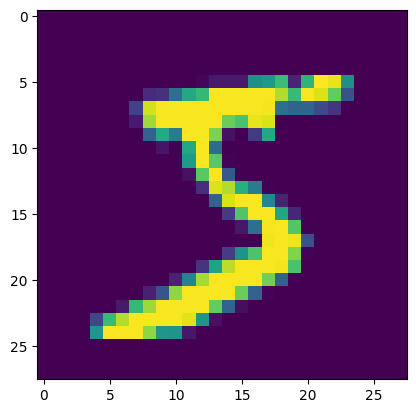

In [ ]:
plt.imshow(X[0].reshape(28,28))

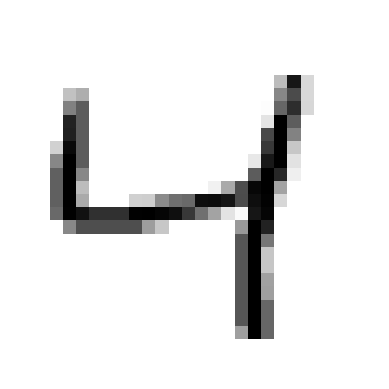

In [ ]:
plt.imshow(X[2].reshape(28,28), cmap = 'binary')
plt.axis('off');

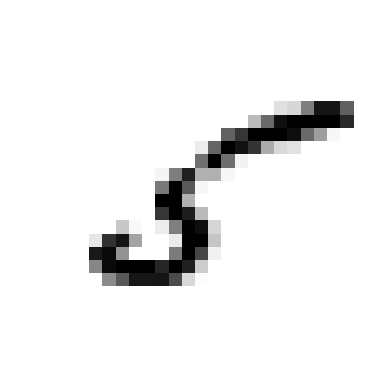

In [ ]:
def digit_image(digit):
  plt.imshow(X[digit].reshape(28,28), cmap = 'binary')
  plt.axis('off');

digit_image(11)

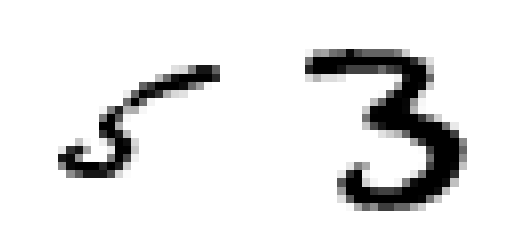

In [ ]:
plt.subplot(1,2,1)     # one row, 2column, first img
digit_image(11)
plt.subplot(1,2,2)
digit_image(12)
plt.show()

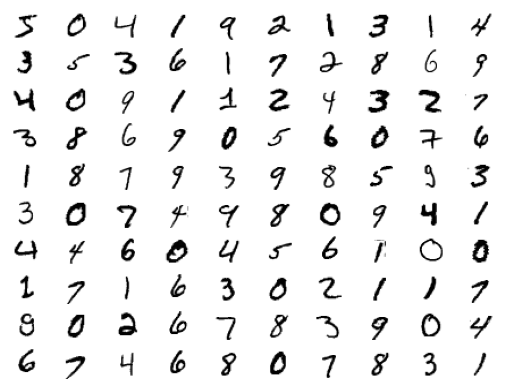

In [ ]:
for idx, image in enumerate(X[0:100]):
  plt.subplot(10, 10,idx+1)
  digit_image(idx)
plt.show()

In [ ]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
y_train[:5], y_train_5[:5]

(array(['5', '0', '4', '1', '9'], dtype=object),
 array([ True, False, False, False, False]))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
dummy_clf.score(X_test, y_test_5)

0.9108

In [ ]:
any([False, True,False]), any([False, False,False])
# if there is one True, returns True, ELSE false

(True, False)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred),f1_score(y_train_5, y_train_pred)

(0.6511713705958311, 0.7325171197343846)

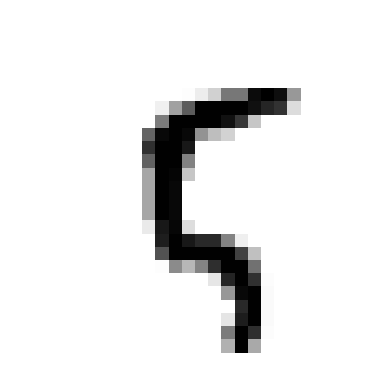

In [ ]:
digit_image(100)

In [ ]:
some_digit = X[100]
y_score = sgd_clf.decision_function([some_digit])
y_score

array([1854.68328897])

In [ ]:
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 3000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

# ROC curve

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3,
                             method = 'decision_function')

In [ ]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

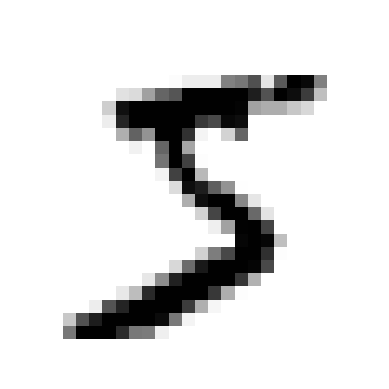

In [ ]:
digit_image(0)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
thresholds[-10:]

array([34530.18696047, 34547.44702864, 34662.20950045, 35261.17927701,
       35987.20307515, 36801.60697028, 37026.25116503, 38871.26391927,
       42216.05562787, 49441.43765905])

In [ ]:
precisions[0], recalls[0], thresholds[0]

(0.09035, 1.0, -146348.56726173862)

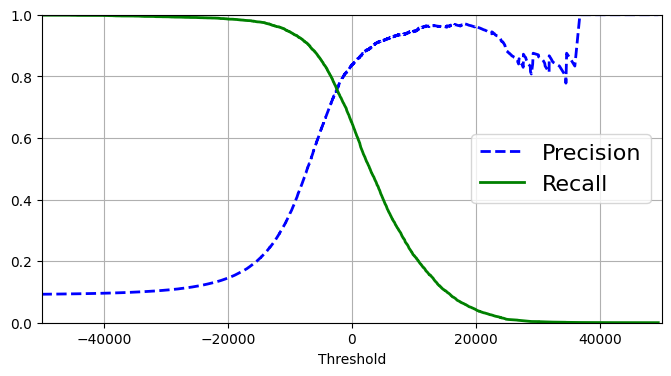

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds,precisions[:-1], 'b--', label = 'Precision', linewidth = 2)
plt.plot(thresholds,recalls[:-1], 'g-', label = 'Recall', linewidth = 2)

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Threshold')

plt.legend(loc = 'center right', fontsize = 16)

plt.show()

In [ ]:
np.array([1,9,3,4,4,4]).argmax()

1

In [ ]:
idx_for_precision = (precisions >= 0.9).argmax()
idx_for_precision

57109

In [ ]:
recalls[idx_for_precision]

0.4799852425751706

In [ ]:
thresholds_for_90_precision = thresholds[idx_for_precision]
thresholds_for_90_precision

3370.0194991439557

In [ ]:
y_train_pred_90 = (y_scores >= thresholds_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rmd_clf = RandomForestClassifier(random_state = 42)

In [ ]:
y_probas_forest = cross_val_predict(rmd_clf, X_train, y_train_5, cv = 2,
                                     method = 'predict_proba')

In [ ]:
y_probas_forest[:2]
# left not sure, right sure

array([[0.2, 0.8],
       [1. , 0. ]])

In [ ]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

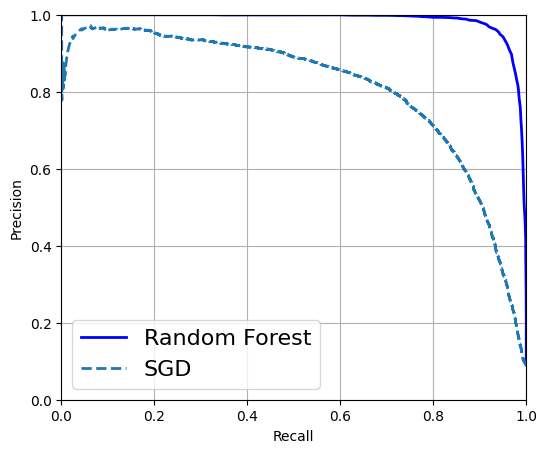

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(recalls_forest, precisions_forest, 'b-', linewidth = 2, label = 'Random Forest')

plt.plot(recalls, precisions, '--', linewidth = 2, label = 'SGD')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1,0,1])
plt.grid()

plt.legend(loc = 'lower left', fontsize = 16)

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rmd_clf = RandomForestClassifier(random_state = 42)

In [ ]:
precisions_forest

array([0.09035   , 0.14889585, 0.20381232, 0.2594667 , 0.31307061,
       0.36724313, 0.42030898, 0.46931157, 0.51332065, 0.55746354,
       0.59789006, 0.63454052, 0.66911582, 0.70024794, 0.73243095,
       0.75976147, 0.78089805, 0.7994003 , 0.81446926, 0.83197492,
       0.84839744, 0.86175943, 0.87390078, 0.88561321, 0.8969583 ,
       0.90639626, 0.91254154, 0.92199965, 0.92742224, 0.93605072,
       0.94103687, 0.94584638, 0.94863712, 0.95383178, 0.9576351 ,
       0.96111533, 0.96350783, 0.96641575, 0.96999805, 0.97315831,
       0.9753646 , 0.97830846, 0.97976763, 0.98223299, 0.98472816,
       0.98504711, 0.98556403, 0.98609381, 0.98849132, 0.98902259,
       0.9901919 , 0.99141262, 0.99155661, 0.99235474, 0.99273128,
       0.99288731, 0.99326902, 0.99318956, 0.99335015, 0.99397869,
       0.99484294, 0.99502959, 0.99593399, 0.99636275, 0.99704142,
       0.99749875, 0.997714  , 0.99819075, 0.99841939, 0.99839829,
       0.99836912, 0.99861993, 0.99887672, 0.99884925, 0.99883

In [ ]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.3
recall_score(y_train_5, y_train_pred_forest)

0.9509315624423538

In [ ]:
idx = (precisions_forest >= 0.9).argmax()
precisions_forest[idx], recalls_forest[idx], thresholds_forest[idx]

(0.906396255850234, 0.9645821804095185, 0.25)

In [ ]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.3
f1_score(y_train_5, y_train_pred_forest)

0.9459583448022754

In [ ]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.3
precision_score(y_train_5, y_train_pred_forest)

0.9410368747718145

# Multiclass Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test, y_test)

0.9705

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train[:2000], y_train[:2000])
svm_clf.score(X_test, y_test)

0.9302

In [ ]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

In [ ]:
some_digit = X[100]
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[-0.26,  0.75,  3.86,  2.74,  7.12,  9.3 ,  6.09,  1.74,  5.1 ,
         8.27]])

In [ ]:
class_id = some_digit_scores.argmax()
class_id

5

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.decision_function_shape = 'ovo'
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[-0.11, -0.4 , -0.09, -0.48, -1.07, -0.31, -0.09, -0.25, -0.63,
        -0.16, -0.08, -0.33, -1.  , -0.42, -0.21, -0.4 , -0.68,  0.4 ,
        -0.25, -1.  , -0.13,  0.24, -0.13, -0.39, -0.44, -1.24, -0.34,
         0.18, -0.63, -0.69, -0.9 ,  0.1 ,  0.52,  0.13, -0.77,  0.81,
         1.  ,  1.  ,  0.71,  0.22,  0.25, -0.37, -0.53, -1.15, -0.15]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.score(X_test, y_test)

0.9256

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
ovr_clf.estimators_, len(ovr_clf.estimators_)

([SVC(random_state=42),
  SVC(random_state=42),
  SVC(random_state=42),
  SVC(random_state=42),
  SVC(random_state=42),
  SVC(random_state=42),
  SVC(random_state=42),
  SVC(random_state=42),
  SVC(random_state=42),
  SVC(random_state=42)],
 10)

In [ ]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['8'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-28526., -15241.,  -6675.,  -7354.,  -8761.,   -348., -12777.,
        -11494.,    631.,  -1012.]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

In [ ]:
X_test_scaled = scaler.transform(X_test.astype(np.float64))
sgd_clf.fit(X_test, y_test)


In [ ]:
ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.score(X_test, y_test)

0.9256

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SVC(random_state=42))
ovo_clf.fit(X_train[:2000], y_train[:2000])

OneVsOneClassifier(estimator=SVC(random_state=42))

In [ ]:
ovo_clf.score(X_test, y_test)

0.9305

# Error Analysis

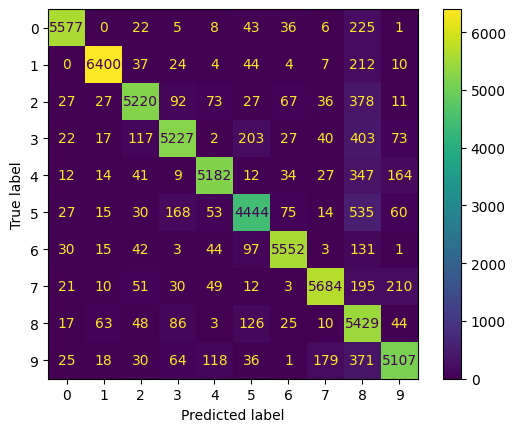

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

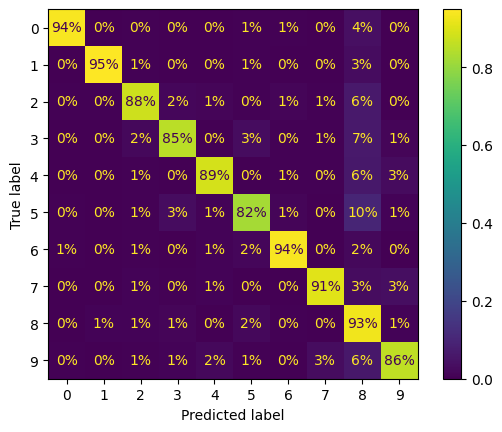

In [ ]:
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize='true', values_format = '.0%')
plt.show()

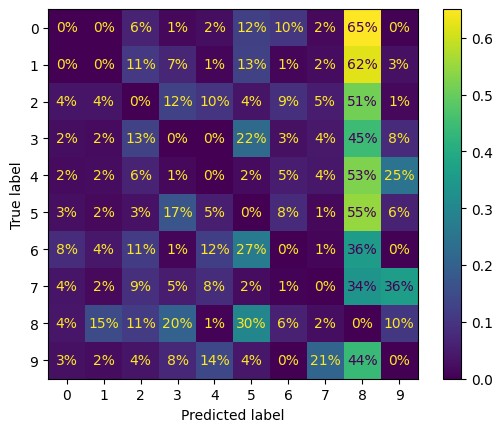

In [ ]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight = sample_weight,
                                        normalize='true', values_format = '.0%')
plt.show()

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

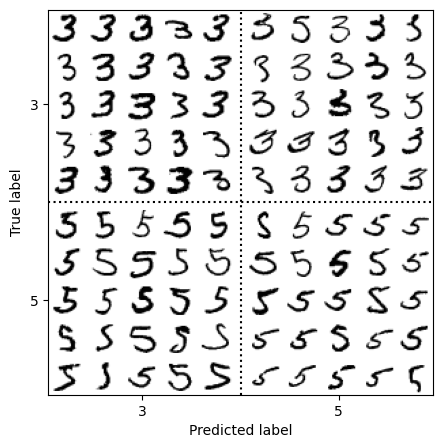

In [ ]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Multilabel Classification

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]    # concanate

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

0.976410265560605

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput Classification

In [ ]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

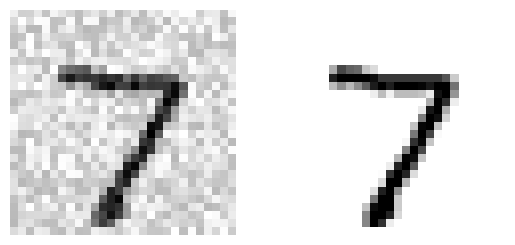

In [ ]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

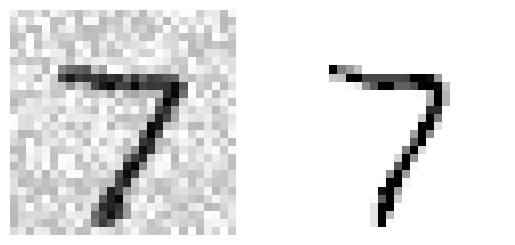

In [ ]:
clean_digit = knn_clf.predict([X_test_mod[0]])
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(clean_digit)

plt.show()